In [1]:
# Importing all necessary librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### **Mining data from the web**

*This phase will involve mining the facebook stock market data from the web through yahoo API (from 2010 to 2020)*

In [2]:
# Importing the data containing daily information of the facebook stock market
companyName = 'FB'
startDate = dt.datetime(2010,1,1)
endDate = dt.datetime(2020,1,1)

data = web.DataReader(companyName, 'yahoo', startDate, endDate)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [3]:
# Analyzing basic information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2012-05-18 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1917 non-null   float64
 1   Low        1917 non-null   float64
 2   Open       1917 non-null   float64
 3   Close      1917 non-null   float64
 4   Volume     1917 non-null   int64  
 5   Adj Close  1917 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 104.8 KB


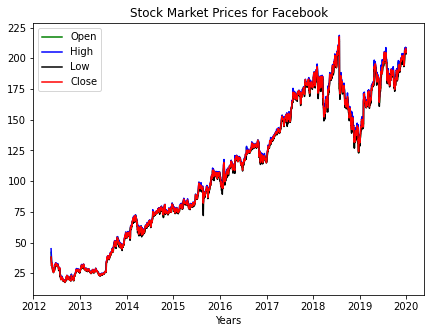

In [4]:
# Plotting the closing value of the stock market
plt.figure(figsize=(7, 5))
plt.title("Stock Market Prices for Facebook")
plt.plot(data['Open'], color='green', label='Open')
plt.plot(data['High'], color='blue', label='High')
plt.plot(data['Low'], color='black', label='Low')
plt.plot(data['Close'], color='red', label='Close')
plt.xlabel("Years")
plt.legend()
plt.show()

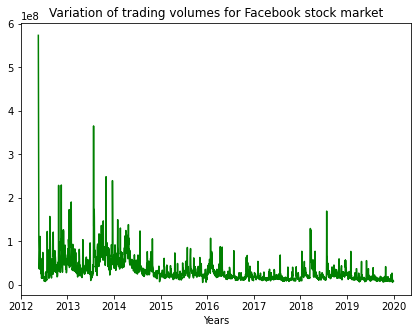

In [5]:
# Understanding the variation in volumes throughout years
plt.figure(figsize=(7, 5))
plt.title("Variation of trading volumes for Facebook stock market")
plt.plot(data['Volume'], color='green')
plt.xlabel("Years")
plt.show()

### **Preprocessing data**

*This phase will involve normalizing the closing prices data and the training for the LSTM model*

In [6]:
# Normalizing the closing prices of the stock market
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1)) # Normalizing the close data since it is the one we will be predicting
scaled_data

array([[0.10261801],
       [0.08159383],
       [0.06642639],
       ...,
       [0.95294592],
       [0.93447466],
       [0.93867948]])

In [7]:
# Preparing the training set
prediction_days = 60  # The model will be trained based on the previous 60 days
X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

len(X_train), len(y_train)

(1857, 1857)

In [8]:
# Turning the training set into numpy array and reshaping 

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape, y_train.shape

((1857, 60, 1), (1857,))

In [9]:
# Building the model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
59/59 [==============================] - 10s 81ms/step - loss: 0.0963
Epoch 2/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0050
Epoch 3/100
59/59 [==============================] - 5s 86ms/step - loss: 0.0040
Epoch 4/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0036
Epoch 5/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0032
Epoch 6/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0032
Epoch 7/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0032
Epoch 8/100
59/59 [==============================] - 5s 85ms/step - loss: 0.0035
Epoch 9/100
59/59 [==============================] - 5s 86ms/step - loss: 0.0029
Epoch 10/100
59/59 [==============================] - 5s 86ms/step - loss: 0.0029
Epoch 11/100
59/59 [==============================] - 5s 86ms/step - loss: 0.0047
Epoch 12/100
59/59 [==============================] - 5s 86ms/step - loss: 0.0033
Epoch 13/100
59/59 [====

### **Testing the model**

*This phase will involve gathering new data (from 2020 - now) which the model hasn't seen and assess how the model will perform on them*

In [10]:
# Getting the testing data
test_start = dt.datetime(2020,1,2)
test_end = dt.datetime.now()

test_data = web.DataReader(companyName, 'yahoo', test_start, test_end)
test_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2020-01-02 to 2021-03-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       303 non-null    float64
 1   Low        303 non-null    float64
 2   Open       303 non-null    float64
 3   Close      303 non-null    float64
 4   Volume     303 non-null    int64  
 5   Adj Close  303 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.6 KB


In [12]:
# Preparing the testing data
actual_prices = test_data['Close'].values
full_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = full_dataset[len(full_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [13]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
  X_test.append(model_inputs[x - prediction_days:x, 0])

# Reshaping the testing set data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(303, 60, 1)

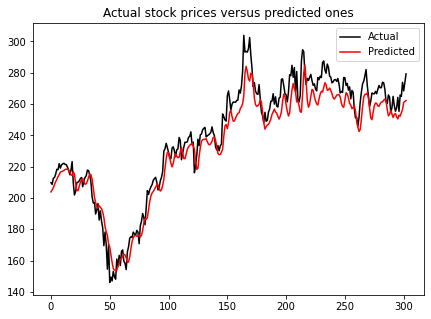

In [14]:
# Testing the model by predicting on new data
predicted_value = model.predict(X_test)
predicted_value = scaler.inverse_transform(predicted_value)

plt.figure(figsize=(7, 5))
plt.title("Actual stock prices versus predicted ones")
plt.plot(actual_prices, color='black', label='Actual')
plt.plot(predicted_value, color='red', label='Predicted')
plt.legend()
plt.show()

Although the model is not 100% efficient, it is able to determine the state of the stock market as seen from the chart above

In [15]:
# Evaluating the model performance using r-squared
from sklearn.metrics import r2_score
print("The accuracy of the model is: ", r2_score(actual_prices, predicted_value)*100, "%")

The accuracy of the model is:  92.65643141086245 %


### **Predicting the stock price for the next day**

*This phase will involve preprocessing the testing data and predicting the next value from the model*

In [16]:
# Preparing data for predicting the next day
real_data = np.array([model_inputs[len(model_inputs)+1-prediction_days : len(model_inputs+1), 0]])
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
real_data.shape

(1, 59, 1)

In [17]:
# Predicting the value for the next day
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("The predicted value for the Facebook stock market is: ", prediction)

The predicted value for the Facebook stock market is:  [[264.9187]]


In [18]:
# # Saving the model
model.save('stock_prediction.sav')

# Reloading the saved model
reloaded_model = tf.keras.models.load_model('stock_prediction.sav')

INFO:tensorflow:Assets written to: stock_prediction.sav/assets


INFO:tensorflow:Assets written to: stock_prediction.sav/assets
